<a href="https://colab.research.google.com/github/dmartinez09/Red_neuronal_Temperature/blob/main/Primera_red_neuronal_python_y_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius = np.array([-40, -10, 0, 8,15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
#El modelo solo tiene 1 neurona
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

#Voy a agregar 3 neuronas al modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

Se usa Framework Keras, se ahorra un paso especificando las variables de salidas, se usan capas densas, aca hay solo dos neuronas.
Se utiliza un modelo secuencial

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

Propiedades, son dos el optimizador llamado Adam(Algoritmo) pesos y sesgos y la funcion de perdida. Adam se debe configurar con numeros pequeños.
loss="mean_squared_error": funcion de perdida, error cuadratico medio; considera que una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños

In [ ]:
print("comenzando el entrenamieto...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo Entrenado!")

comenzando el entrenamieto...
Modelo Entrenado!


Vamos a entrenar el modelo: fit se encarga de esto y le indicamos cuantas vueltas quieres que lo intente, epochs recorre la cantidad de veces que el modelo buscara la mejor opcion.
Verbose elimina la basura.

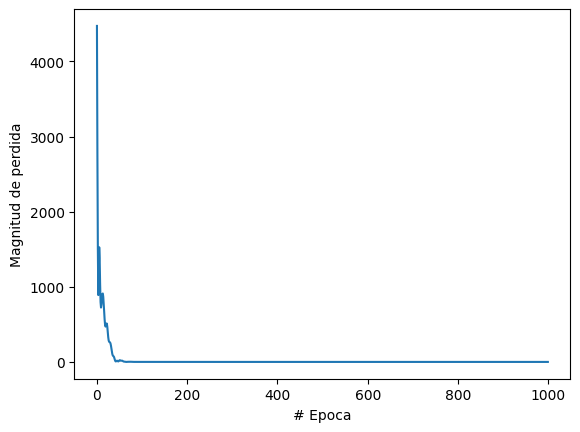

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Aca veremos los resultados de la funcion de perdida. en base a esto vamos detectando las vueltas que debe tener el modelo de aprendizaje epochs, podrian ser 500 vueltas...

**Probemos si la red neuronal funciona!**

In [ ]:
print("Hagamos nuestra primera predicción")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado)+ "fahrenheit!")

Hagamos nuestra primera predicción
1/1 [==============================] - 0s 107ms/step
El resultado es [[211.74744]]fahrenheit!


Comprobemos que datos se asignaron a la conexion y el sesgo

In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights()) sesgos con 1 neurona
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.39663932,  0.05170216, -0.5872676 ]], dtype=float32), array([ 3.8945904, -3.2741954, -4.1113667], dtype=float32)]
[array([[ 0.67341924,  0.6225365 , -1.2915179 ],
       [ 0.29044664, -1.164116  ,  0.6199197 ],
       [ 0.2722542 , -0.6178516 ,  1.061928  ]], dtype=float32), array([-0.7572409,  3.9770565, -3.909958 ], dtype=float32)]
[array([[-0.08568905],
       [ 0.5870798 ],
       [-1.345993  ]], dtype=float32), array([3.8061264], dtype=float32)]


In [ ]:
print("Hagamos nuestra segunda predicción")
resultado = modelo.predict([20.0])
print("El resultado es " + str(resultado)+ "fahrenheit!")

Hagamos nuestra segunda predicción
1/1 [==============================] - 0s 41ms/step
El resultado es [[67.911514]]fahrenheit!


In [ ]:
print("Hagamos nuestra segunda predicción")
resultado = modelo.predict([0.0])
print("El resultado es " + str(resultado)+ "fahrenheit!")

Hagamos nuestra segunda predicción
1/1 [==============================] - 0s 39ms/step
El resultado es [[31.952526]]fahrenheit!
